In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

cyberdf = pd.read_csv('../Data_Sources/Cyberpunk_2077_Steam_Reviews.csv')
cyberKeep = ['ReviewID', 'Rating', 'Hours Played', 'Received for Free', 'Update']
cyberdf = cyberdf[cyberKeep]

cyberdf['Hours Played'] = pd.to_numeric(cyberdf['Hours Played'], errors='coerce')
cyberdf = cyberdf.dropna(subset=['Hours Played'])
cyberdf['Hours Played'] = cyberdf['Hours Played'].astype(int)
cyberdf = cyberdf[cyberdf['Hours Played'] <= 1000]

cyberdf.shape

(755817, 5)

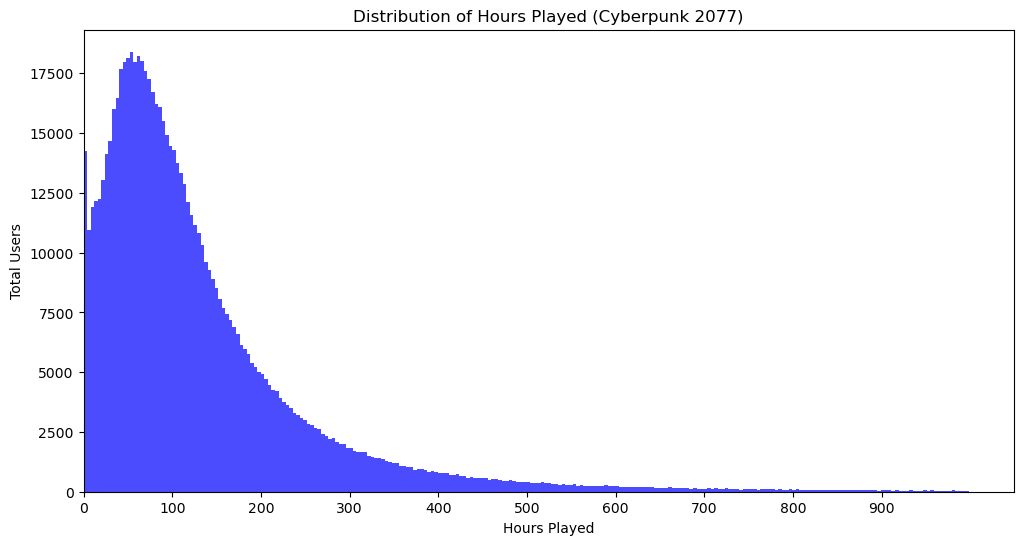

In [27]:
plt.figure(figsize=(12,6))
plt.hist(cyberdf['Hours Played'], bins=250, color='blue', alpha=0.7)

plt.title('Distribution of Hours Played (Cyberpunk 2077)')
plt.xlabel('Hours Played')
plt.ylabel('Total Users')

plt.xticks(np.arange(0, cyberdf['Hours Played'].max() + 1, 100))
plt.xlim(left=0)

plt.show()

In [83]:
eldendf = pd.read_csv('df_eldenRing.csv')
eldenKeep = ['voted_up', 'author.playtime_at_review']
eldendf = eldendf[eldenKeep]
eldendf['author.playtime_at_review'] = eldendf['author.playtime_at_review']/60
eldendf['author.playtime_at_review'] = eldendf['author.playtime_at_review'].round().astype(int)

eldendf['author.playtime_at_review'] = pd.to_numeric(eldendf['author.playtime_at_review'], errors='coerce')
eldendf = eldendf.dropna(subset=['author.playtime_at_review'])
eldendf['author.playtime_at_review'] = eldendf['author.playtime_at_review']
eldendf = eldendf[eldendf['author.playtime_at_review'] <= 1000]

eldendf.shape

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10604\1042403854.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  eldendf = pd.read_csv('df_eldenRing.csv')


(500343, 2)

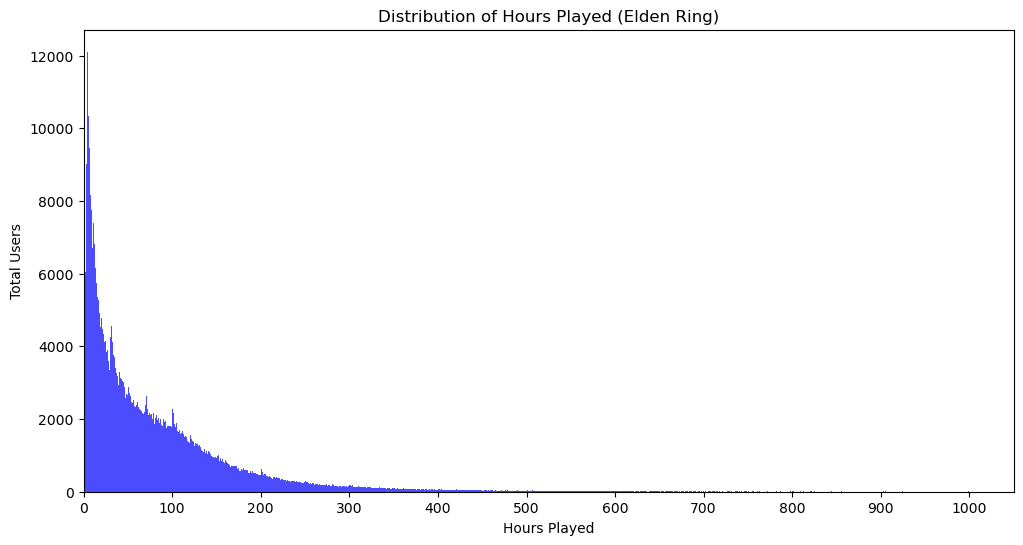

In [85]:
plt.figure(figsize=(12,6))
plt.hist(eldendf['author.playtime_at_review'], bins=1000, color='blue', alpha=0.7)

plt.title('Distribution of Hours Played (Elden Ring)')
plt.xlabel('Hours Played')
plt.ylabel('Total Users')

plt.xticks(np.arange(0, eldendf['author.playtime_at_review'].max() + 1, 100))
plt.xlim(left=0)

plt.show()

In [19]:
nomandf = pd.read_csv('No_Mans_Sky_Reviews.csv')
nomanKeep = ['Hours Played']
nomandf = nomandf[nomanKeep]
nomandf['Hours Played'] = pd.to_numeric(nomandf['Hours Played'], errors='coerce')
nomandf = nomandf.dropna(subset=['Hours Played'])
nomandf = nomandf[nomandf['Hours Played'] <= 1000]

nomandf.shape

(307762, 1)

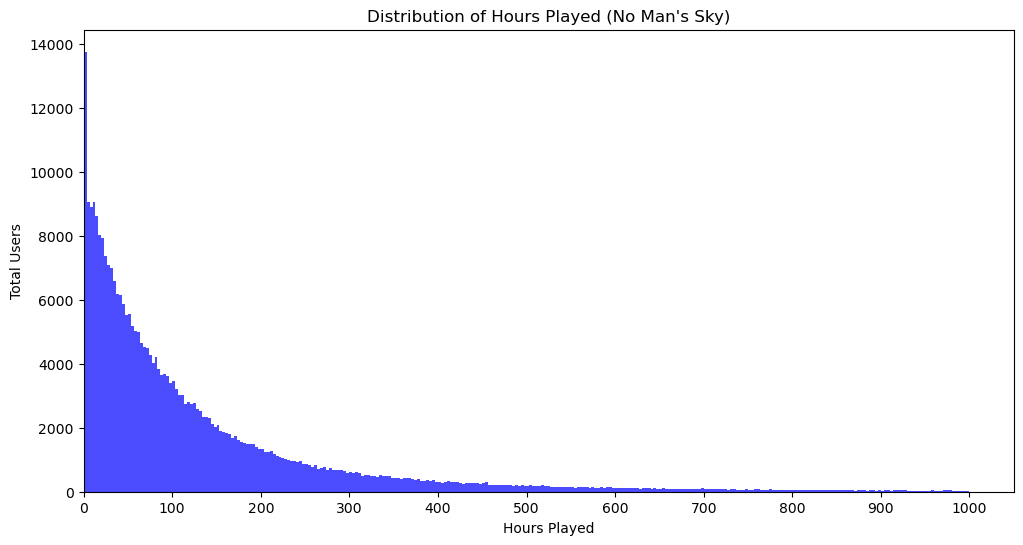

In [21]:
plt.figure(figsize=(12,6))
plt.hist(nomandf['Hours Played'], bins=300, color='blue', alpha=0.7)

plt.title("Distribution of Hours Played (No Man's Sky)")
plt.xlabel('Hours Played')
plt.ylabel('Total Users')

plt.xticks(np.arange(0, nomandf['Hours Played'].max() + 1, 100))
plt.xlim(left=0)

plt.show()

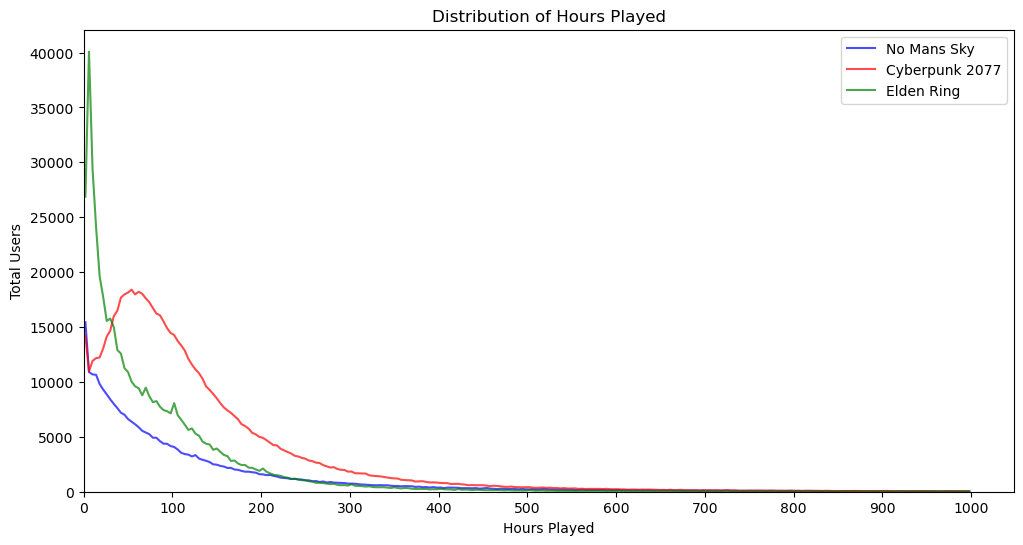

In [31]:
counts_nms, bin_edges_nms = np.histogram(nomandf['Hours Played'], bins=250)
counts_cp, bin_edges_cp = np.histogram(cyberdf['Hours Played'], bins=250)
counts_er, bin_edges_er = np.histogram(eldendf['author.playtime_at_review'], bins=250)

bin_midpoints_nms = (bin_edges_nms[:-1] + bin_edges_nms[1:]) / 2
bin_midpoints_cp = (bin_edges_cp[:-1] + bin_edges_cp[1:]) / 2
bin_midpoints_er = (bin_edges_er[:-1] + bin_edges_er[1:]) / 2

plt.figure(figsize=(12, 6))

plt.plot(bin_midpoints_nms, counts_nms, color='blue', alpha=0.7, label='No Mans Sky')
plt.plot(bin_midpoints_cp, counts_cp, color='red', alpha=0.7, label='Cyberpunk 2077')
plt.plot(bin_midpoints_er, counts_er, color='green', alpha=0.7, label='Elden Ring')

plt.title('Distribution of Hours Played')
plt.xlabel('Hours Played')
plt.ylabel('Total Users')

max_hours = max(nomandf['Hours Played'].max(), cyberdf['Hours Played'].max(), eldendf['author.playtime_at_review'].max())
plt.xticks(np.arange(0, max_hours + 1, 100))
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.legend()
plt.show()

In [33]:
#Showing info from the data
cyberdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 755817 entries, 0 to 760329
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ReviewID           755817 non-null  int64 
 1   Rating             755817 non-null  object
 2   Hours Played       755817 non-null  int32 
 3   Received for Free  755817 non-null  bool  
 4   Update             755817 non-null  object
dtypes: bool(1), int32(1), int64(1), object(2)
memory usage: 26.7+ MB


In [35]:
#Showing the first 5 rows
cyberdf.head(5)

,ReviewID,Rating,Hours Played,Received for Free,Update
0,81918897,Recommended,401,False,Release
1,81918903,Recommended,247,True,Release
3,81918912,Recommended,8,False,Release
4,81918918,Not Recommended,86,True,Release
5,81918923,Recommended,27,True,Release


In [37]:
#Showing the last 5 rows
cyberdf.tail(5)

,ReviewID,Rating,Hours Played,Received for Free,Update
760325,172729321,Recommended,16,False,Patch 2.12
760326,172729968,Recommended,20,False,Patch 2.12
760327,172730150,Recommended,215,False,Patch 2.12
760328,172730437,Recommended,25,False,Patch 2.12
760329,172731691,Recommended,130,False,Patch 2.12


In [39]:
#Describe
cyberdf['Hours Played'].describe()

count    755817.000000
mean        131.014357
std         125.600719
min           0.000000
25%          51.000000
50%          96.000000
75%         167.000000
max         999.000000
Name: Hours Played, dtype: float64

-123.0
341.0


Text(0, 0.5, 'Hours Played')

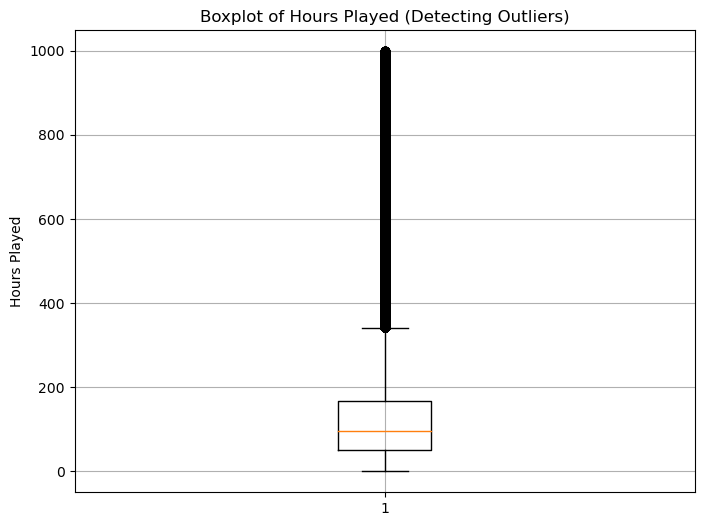

In [101]:
# Convert the "Hours Played" column to numeric (handling any non-numeric issues) for analysis
cyberdf['Hours Played'] = pd.to_numeric(cyberdf['Hours Played'], errors='coerce')

# Define a function to find outliers using the IQR method
def find_outliers_iqr(df, column_name):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    
    # Calculate the IQR
    IQR = Q3 - Q1
    
    # Define the outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    print(lower_bound)
    print(upper_bound)
    
    return outliers

# Find the outliers in the "Hours Played" column
outliers_hours_played = find_outliers_iqr(cyberdf, 'Hours Played')

plt.figure(figsize=(8, 6))
plt.boxplot(cyberdf['Hours Played'].dropna(), vert=True)
plt.title('Boxplot of Hours Played (Detecting Outliers)')
plt.grid()
plt.ylabel('Hours Played')

In [ ]:
#Total Hours Played Graph
cyberdf['Hours Played'] = pd.to_numeric(cyberdf['Hours Played'], errors='coerce')
cyberdf = cyberdf.dropna(subset=['Hours Played'])

plt.figure(figsize=(12,6))
plt.hist(cyberdf['Hours Played'], bins=500, color='blue', alpha=0.7)
plt.title('Distribution of Hours Played')
plt.xlabel('Hours Played')
plt.ylabel('Total Users')

plt.xticks(np.arange(0, cyberdf['Hours Played'].max() + 1, 100))
plt.xlim(left=0)
plt.grid(True)
plt.show()

In [49]:
#Checking for missing values
cyberdf.isnull()

#Checks for missing values in each column
cyberdf.isnull().sum()

ReviewID             0
Rating               0
Hours Played         0
Received for Free    0
Update               0
dtype: int64

In [51]:
#Handling Duplicates
cyberdf = cyberdf.drop_duplicates()
cyberdf.shape

(755817, 5)

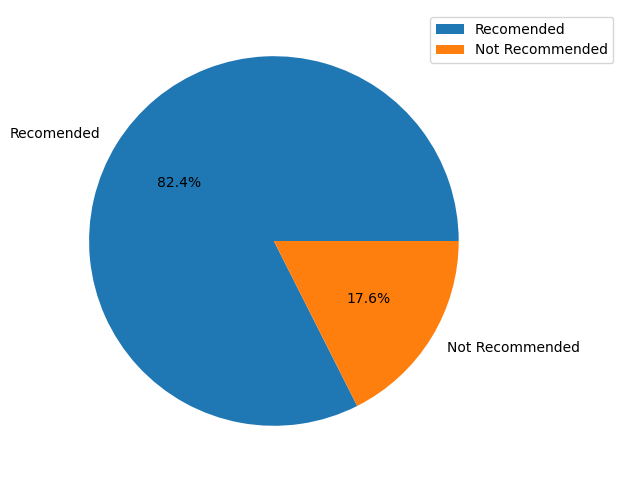

In [53]:
#Rating Piechart
plt.figure(figsize=(8,6))

ratingTotal = cyberdf['Rating'].value_counts()
plt.pie(ratingTotal, labels=['Recomended', 'Not Recommended'], autopct='%1.1f%%')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

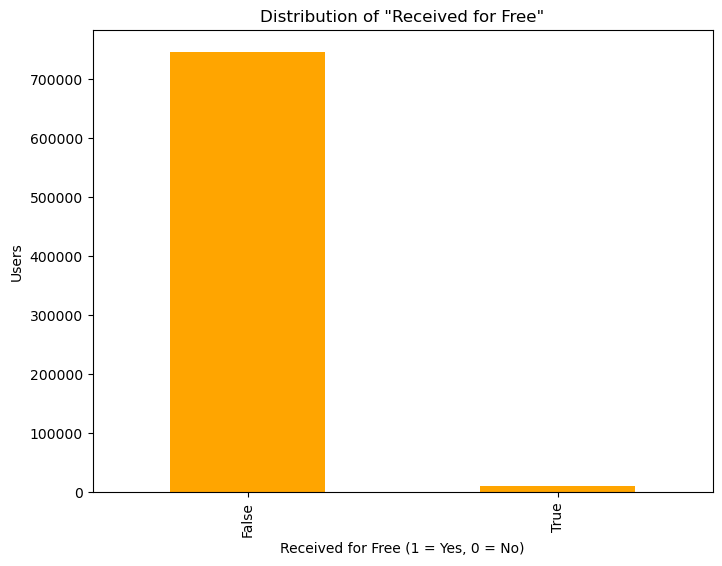

In [49]:
#Received for Free Graph
plt.figure(figsize=(8,6))
cyberdf['Received for Free'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of "Received for Free"')
plt.xlabel('Received for Free (1 = Yes, 0 = No)')
plt.ylabel('Users')
plt.show()

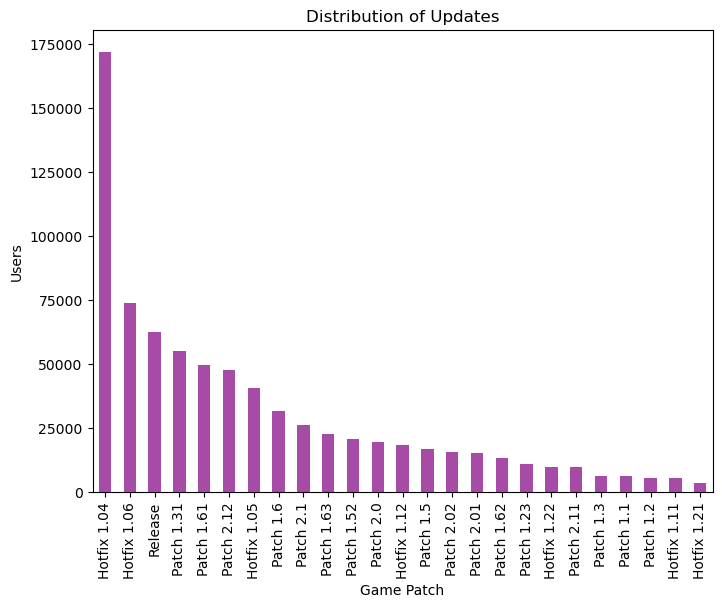

In [51]:
#Update Graph
plt.figure(figsize=(8,6))
cyberdf['Update'].value_counts().plot(kind='bar', color='purple', alpha=0.7)
plt.title('Distribution of Updates')
plt.xlabel('Game Patch')
plt.ylabel('Users')
plt.show()

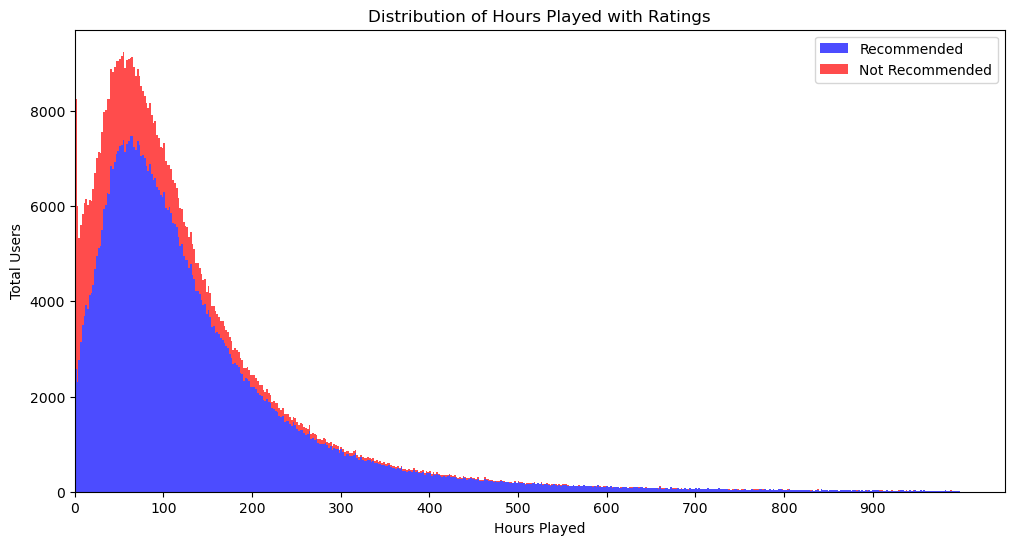

In [55]:
#Relation between Hours Played and Rating
recommended = cyberdf[cyberdf['Rating'] == 'Recommended']
not_recommended = cyberdf[cyberdf['Rating'] == 'Not Recommended']

plt.figure(figsize=(12, 6))
plt.hist([recommended['Hours Played'], not_recommended['Hours Played']], bins=500, stacked=True,
         color=['blue', 'red'], alpha=0.7, label=['Recommended', 'Not Recommended'])
plt.title('Distribution of Hours Played with Ratings')
plt.xlabel('Hours Played')
plt.ylabel('Total Users')

plt.xticks(np.arange(0, cyberdf['Hours Played'].max() + 1, 100))
plt.xlim(left=0)
plt.legend()
plt.show()

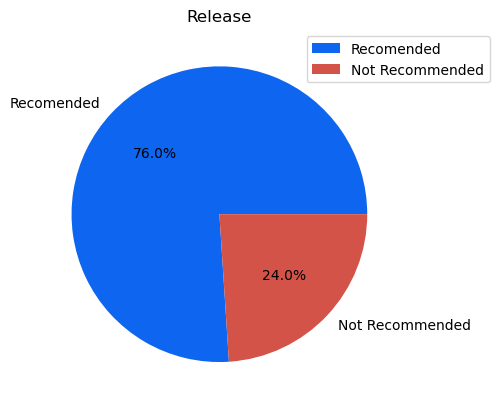

In [55]:
#Relation between Release and Rating
plt.title('Release')
release = cyberdf[cyberdf['Update'] == 'Release']
releaseRating = release['Rating'].value_counts()
plt.pie(releaseRating, labels=['Recomended', 'Not Recommended'], autopct='%1.1f%%', colors=['#0E65EF', '#D35348'])
plt.legend(loc = 'upper right', bbox_to_anchor = (1.25,1))
plt.show()

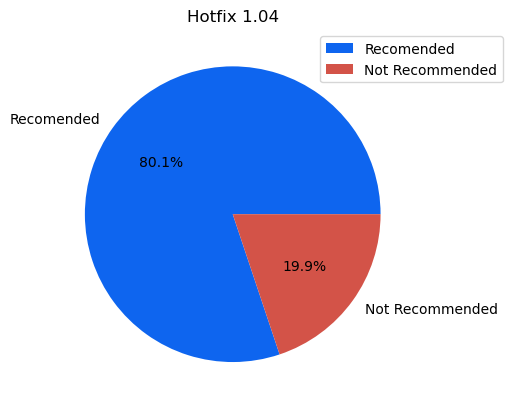

In [57]:
#Relation between Hotfix 1.04 and Rating
hotfix1_04 = cyberdf[cyberdf['Update'] == 'Hotfix 1.04']
hotfix1_04Rating = hotfix1_04['Rating'].value_counts()
plt.pie(hotfix1_04Rating, labels=['Recomended', 'Not Recommended'], autopct='%1.1f%%', colors=['#0E65EF', '#D35348'])
plt.title('Hotfix 1.04')
plt.legend(loc = 'upper right', bbox_to_anchor = (1.25,1))
plt.show()

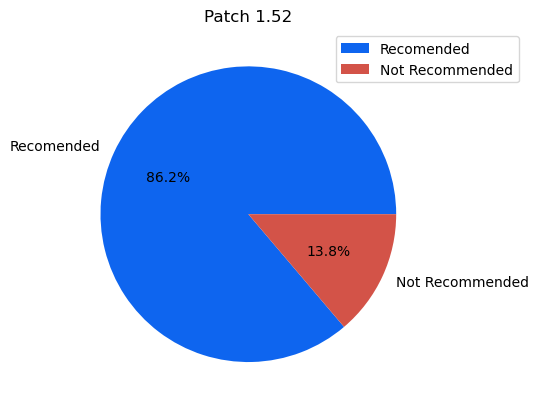

In [59]:
#Relation between Patch 1.52 and Rating
patch1_52 = cyberdf[cyberdf['Update'] == 'Patch 1.52']
patch1_52Rating = patch1_52['Rating'].value_counts()
plt.pie(patch1_52Rating, labels=['Recomended', 'Not Recommended'], autopct='%1.1f%%', colors=['#0E65EF', '#D35348'])
plt.title('Patch 1.52')
plt.legend(loc = 'upper right', bbox_to_anchor = (1.25,1))
plt.show()

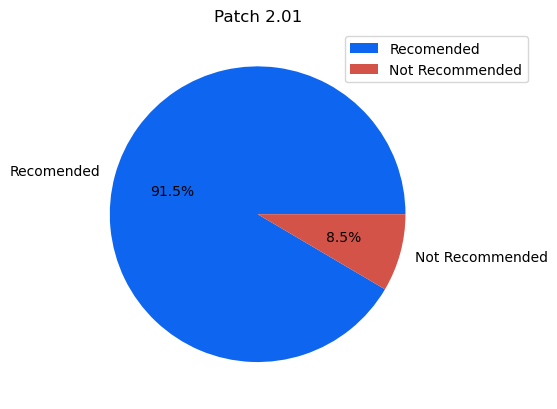

In [61]:
#Relation between Patch 2.01 and Rating
patch2_01 = cyberdf[cyberdf['Update'] == 'Patch 2.01']
patch2_01Rating = patch2_01['Rating'].value_counts()
plt.pie(patch2_01Rating, labels=['Recomended', 'Not Recommended'], autopct='%1.1f%%', colors=['#0E65EF', '#D35348'])
plt.title('Patch 2.01')
plt.legend(loc = 'upper right', bbox_to_anchor = (1.25,1))
plt.show()

In [5]:
#Unique values in 'Rating' column
cyberdf['Rating'].unique()

array(['Recommended', 'Not Recommended'], dtype=object)

In [59]:
#Unique values in 'Received for Free' column
cyberdf['Received for Free'].unique()

array([False,  True])

In [61]:
#Unique values in 'Update' column
cyberdf['Update'].unique()

array(['Release', 'Hotfix 1.04', 'Hotfix 1.05', 'Hotfix 1.06',
       'Patch 1.1', 'Hotfix 1.11', 'Hotfix 1.12', 'Patch 1.2',
       'Hotfix 1.21', 'Hotfix 1.22', 'Patch 1.23', 'Patch 1.3',
       'Patch 1.31', 'Patch 1.5', 'Patch 1.52', 'Patch 1.6', 'Patch 1.61',
       'Patch 1.62', 'Patch 1.63', 'Patch 2.0', 'Patch 2.01',
       'Patch 2.02', 'Patch 2.1', 'Patch 2.12', 'Patch 2.11'],
      dtype=object)

In [63]:
#Count of unique values in 'Rating' column
cyberdf['Rating'].value_counts()

Rating
Recommended        623123
Not Recommended    132694
Name: count, dtype: int64

In [65]:
#Count of unique values in 'Received for Free' column
cyberdf['Received for Free'].value_counts()

Received for Free
False    746102
True       9715
Name: count, dtype: int64

In [67]:
#Count of unique values in 'Update' column
cyberdf['Update'].value_counts()

Update
Hotfix 1.04    171807
Hotfix 1.06     73624
Release         62295
Patch 1.31      54837
Patch 1.61      49525
Patch 2.12      47517
Hotfix 1.05     40369
Patch 1.6       31510
Patch 2.1       26050
Patch 1.63      22414
Patch 1.52      20719
Patch 2.0       19379
Hotfix 1.12     18411
Patch 1.5       16910
Patch 2.02      15594
Patch 2.01      14986
Patch 1.62      13277
Patch 1.23      10819
Hotfix 1.22      9735
Patch 2.11       9561
Patch 1.3        6211
Patch 1.1        6170
Patch 1.2        5552
Hotfix 1.11      5250
Hotfix 1.21      3295
Name: count, dtype: int64

In [39]:
def calculate_recommendation_percentage_for_intervals(df, interval):
    percentage_dict = {}
    
    for hours_played in interval:
        filtered_data = cyberdf[cyberdf['Hours Played'] == hours_played]
        total_reviews = len(filtered_data)
        recommended_reviews = len(filtered_data[filtered_data['Rating'] == 'Recommended'])
        if total_reviews > 0:
            recommendation_percentage = (recommended_reviews / total_reviews) * 100
        else:
            continue
        percentage_dict[hours_played] = recommendation_percentage
    return percentage_dict

def plotting(data):
    hours_played = list(data.keys())
    percentage = list(data.values())
    plt.figure(figsize=(10,6))
    plt.plot(hours_played, percentage,'o')
    plt.grid()
    plt.xlabel('Hours Played')
    plt.ylabel('Percentage of Positive Ratings (%)')


def calc(data):
    xy_list = []
    data_x = []
    data_y = []
    x = list(data.keys())
    y = list(data.values())
    for key, value in data.items():
        xy = key * value
        keysquared = key ** 2
        valuesquared = value ** 2
        data_x.append(keysquared)
        data_y.append(valuesquared)
        xy_list.append(xy)
    return x, y, xy_list, data_x, data_y

def summation(x, y, xy_list, data_x, data_y):
    sum_x = sum(x)
    sum_y = sum(y)
    xy_list = sum(xy_list)
    data_x = sum(data_x)
    data_y = sum(data_y)
    return sum_x, sum_y, xy_list, data_x, data_y

Pearson correlation coefficient (r): 0.7445


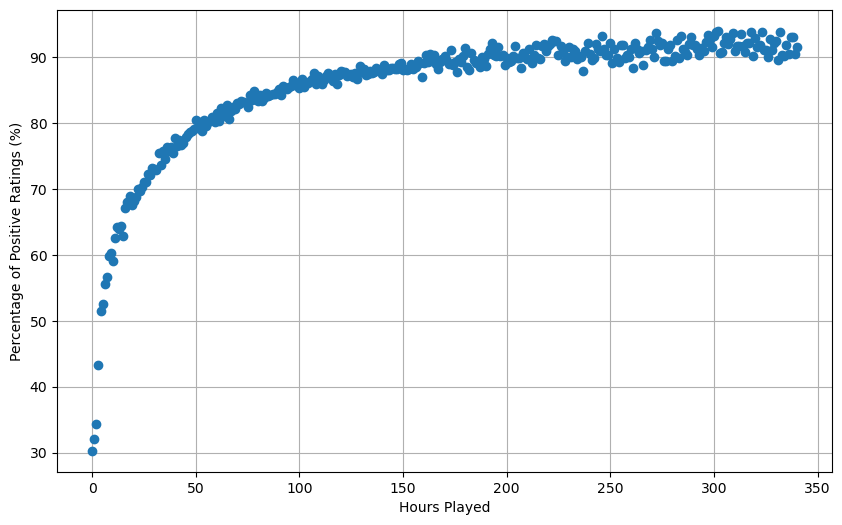

In [35]:
#EDIT ONLY STARTING FROM THIS PART
amountofdata = 341
#..TO THIS PART!

interval = int(341/amountofdata)
start = 0
end = 341
rangeofvalues = range(start, end, interval)
percentage_dict = calculate_recommendation_percentage_for_intervals(cyberdf, rangeofvalues)

#for hours_played, percentage in percentage_dict.items():
    #print(f"Percentage of recommendations at {hours_played} hours: {percentage:.2f}%")

plotting(percentage_dict)
x, y, xy, x_squared, y_squared = calc(percentage_dict)
n = len(x)
sum_x, sum_y, sum_xy, sum_x_squared, sum_y_squared = summation(x, y, xy, x_squared, y_squared)


# Compute the numerator and denominator
numerator = n * sum_xy - sum_x * sum_y
denominator = np.sqrt((n * sum_x_squared - sum_x**2) * (n * sum_y_squared - sum_y**2))
if denominator == 0:
    r = 0
else:
    r = numerator / denominator
print(f"Pearson correlation coefficient (r): {r:.4f}")
plt.show()

In [15]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Replace this with your own data for Hours Played and Percentage of Positive Ratings
hours_played = cyberdf('Hours Played')
percentage_positive_ratings = percentage_dict()  # Example positive rating %

# Define the logarithmic model: y = a * log(x) + b
def log_model(x, a, b):
    return a * np.log(x) + b

# Define the exponential decay model: y = a * (1 - e^(-bx))
def exp_decay_model(x, a, b):
    return a * (1 - np.exp(-b * x))

# Fit the data to the logarithmic model
log_params, log_covariance = curve_fit(log_model, hours_played, percentage_positive_ratings)

# Fit the data to the exponential decay model
exp_decay_params, exp_decay_covariance = curve_fit(exp_decay_model, hours_played, percentage_positive_ratings)

# Plot the original data and both fitted models
plt.figure(figsize=(10, 6))
plt.scatter(hours_played, percentage_positive_ratings, label="Data", color="blue")

# Plot logarithmic fit
plt.plot(hours_played, log_model(hours_played, *log_params), label="Logarithmic Fit", color="green")

# Plot exponential decay fit
plt.plot(hours_played, exp_decay_model(hours_played, *exp_decay_params), label="Exponential Decay Fit", color="red")

plt.title("Logarithmic and Exponential Decay Fit")
plt.xlabel("Hours Played")
plt.ylabel("Percentage of Positive Ratings (%)")
plt.legend()

# Display plot
plt.show()

# Display the coefficients for both models
print("Logarithmic Model Coefficients (a, b):", log_params)
print("Exponential Decay Model Coefficients (a, b):", exp_d


SyntaxError: incomplete input (75958752.py, line 43)

In [31]:
# Re-apply the correct encoding on "Rating" and "Received for Free" without creating new columns

def column_encode(df):
    # Encode "Rating" column: "Recommended" -> 1, "Not Recommended" -> 0
    df['Rating'] = df['Rating'].apply(lambda x: 1 if x == "Recommended" else 0)
    
    # Encode "Received for Free" column: "True" -> 1, "False" -> 0
    df['Received for Free'] = df['Received for Free'].apply(lambda x: 1 if x == True or x == 'True' else 0)
    
    return df

def one_hot_encode(df):
    # Perform one-hot encoding for the "Update" column
    unique_values = df['Update'].unique()  # Get unique values in the "Update" column
    for value in unique_values:
        df[f'Update_{value}'] = df['Update'].apply(lambda x: 1 if x == value else 0)
    
    # Drop the original "Update" column
    df.drop(columns=['Update'], inplace=True)
    
    return df

# Apply the corrected encoding functions to the cyberdf dataframe
cyberdf = column_encode(cyberdf)
cyberdf = one_hot_encode(cyberdf)

# Show the updated dataframe to verify the results
cyberdf.head()

,ReviewID,Rating,Hours Played,Received for Free,Update_Release,Update_Hotfix 1.04,Update_Hotfix 1.05,Update_Hotfix 1.06,Update_Patch 1.1,Update_Hotfix 1.11,...,Update_Patch 1.6,Update_Patch 1.61,Update_Patch 1.62,Update_Patch 1.63,Update_Patch 2.0,Update_Patch 2.01,Update_Patch 2.02,Update_Patch 2.1,Update_Patch 2.12,Update_Patch 2.11
0,81918897,1,401,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,81918903,1,247,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,81918912,1,8,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,81918918,0,86,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,81918923,1,27,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
